# Linear Regression II: Homework

### Question 1:

* Load the Boston Housing Dataset
* Find the feature with highest correlation with the Median House Value
* Predict the Median House Value with the highest correlated feature
* How does the prediction of the this model (R2) compare with the prediction of the model used in the exercise in class that used all the features instead of just the most correlated feature?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [2]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
# Find the feature with highest correlation with the Median House Value
for i in range(len(boston.columns)):
    x = boston[boston.columns[i]]
    y = boston_dataset.target
    r = np.corrcoef(x, y)
    r = r[0,1]
    print(f'{boston.columns[i]} R2: {r}')
print('\nLSTAT (% lower status of the population) has the highest correlation with the Median House Value')

CRIM R2: -0.38830460858681154
ZN R2: 0.3604453424505432
INDUS R2: -0.4837251600283729
CHAS R2: 0.17526017719029843
NOX R2: -0.4273207723732826
RM R2: 0.6953599470715391
AGE R2: -0.3769545650045963
DIS R2: 0.24992873408590388
RAD R2: -0.381626230639778
TAX R2: -0.4685359335677669
PTRATIO R2: -0.5077866855375621
B R2: 0.33346081965706637
LSTAT R2: -0.7376627261740151

LSTAT (% lower status of the population) has the highest correlation with the Median House Value


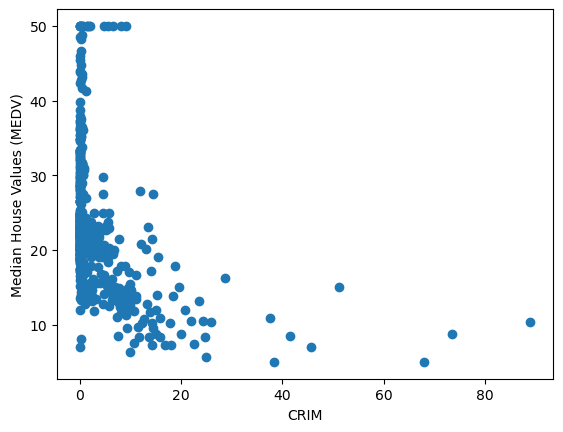

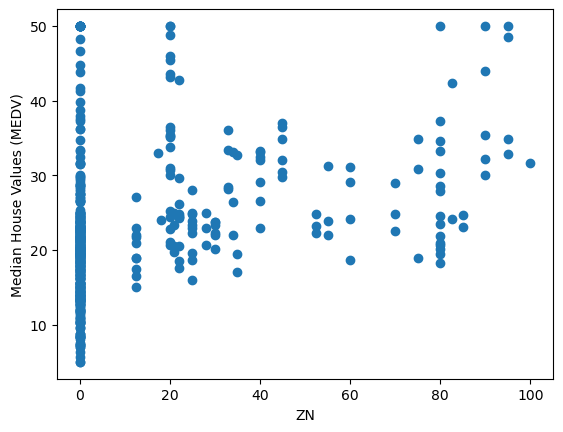

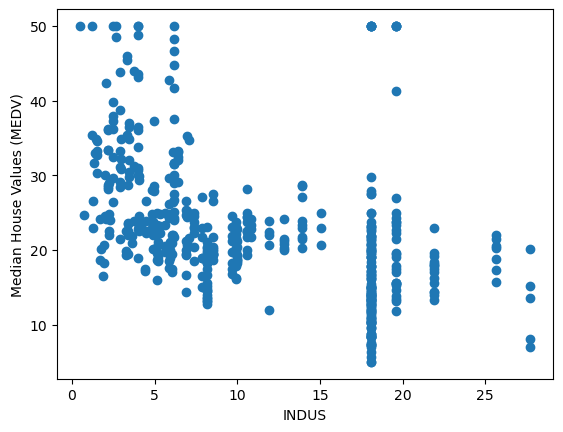

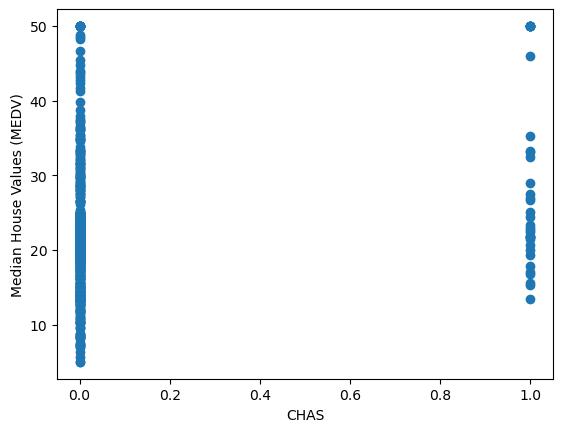

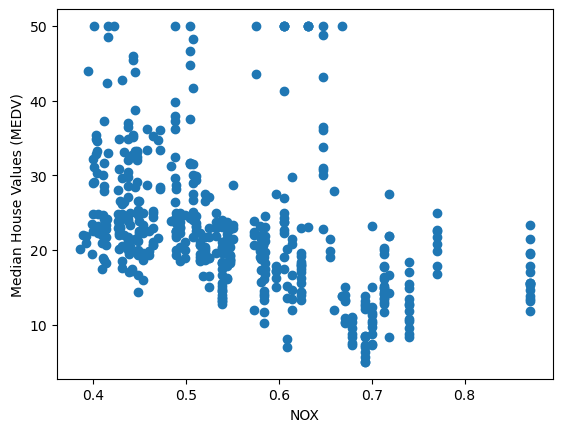

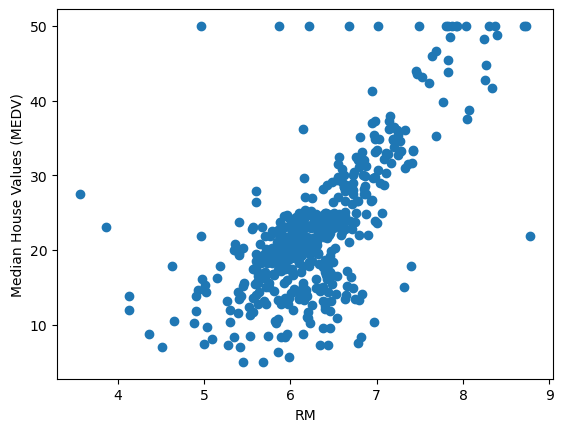

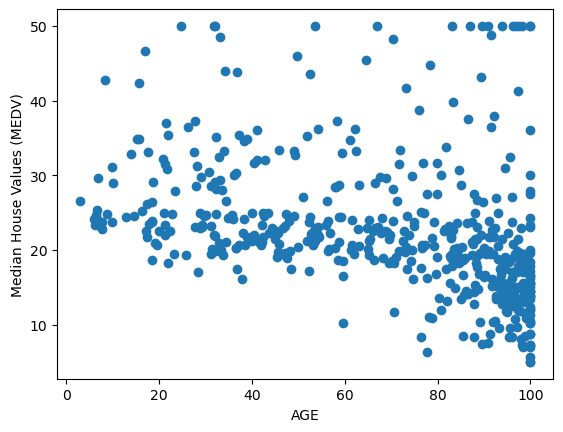

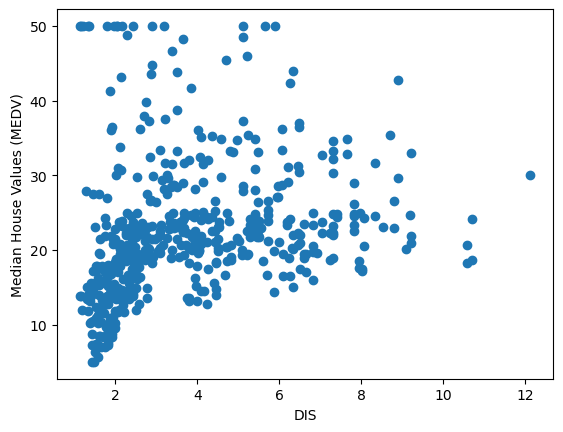

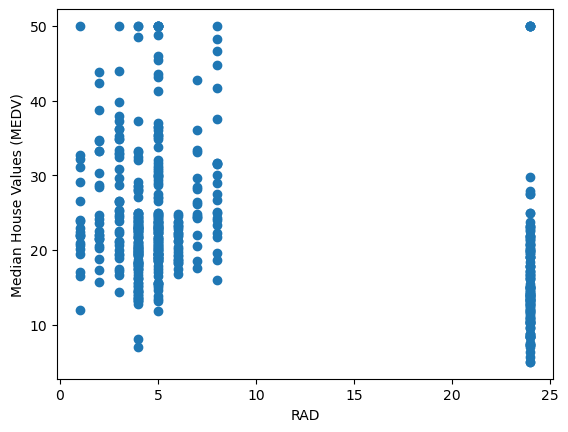

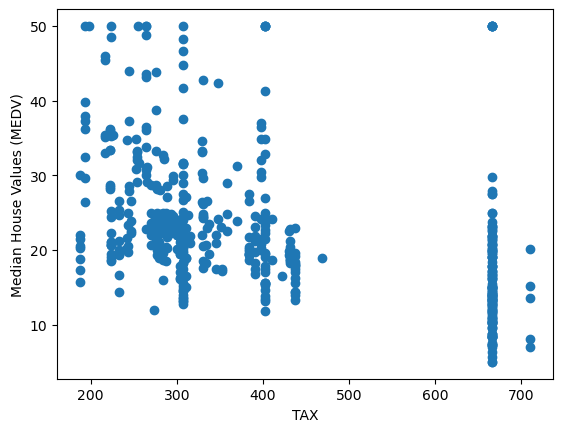

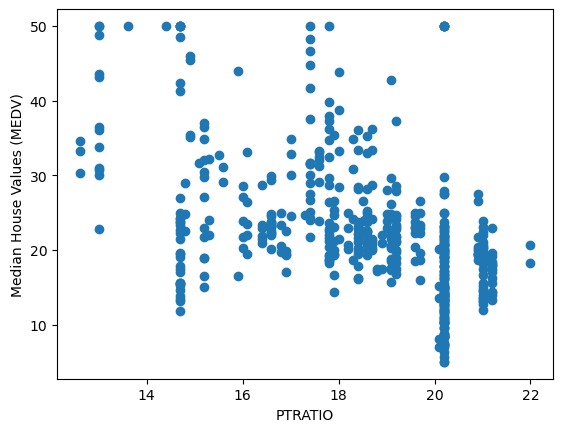

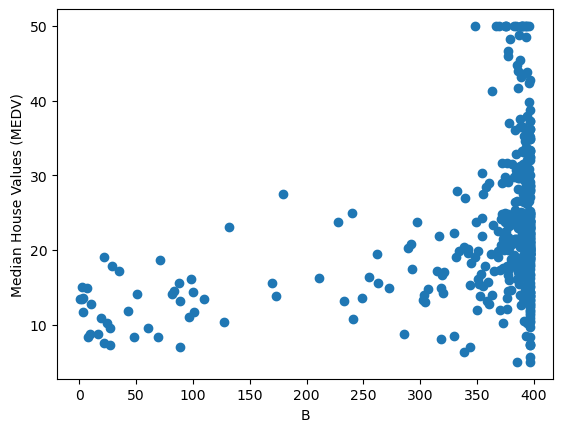

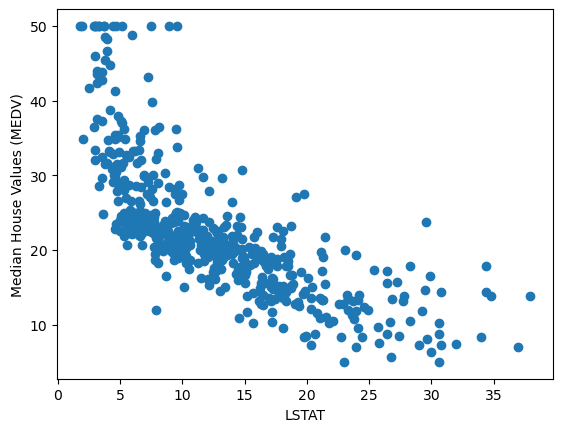

In [6]:
# Plotting each variable's relationship with Median House Value (just for fun)
for i in range(len(boston.columns)):
    x = boston[boston.columns[i]]
    x = np.array(x).reshape(-1,1)
    y = boston_dataset.target
    plt.scatter(x, y, marker='o')
    plt.xlabel(boston.columns[i])
    plt.ylabel('Median House Values (MEDV)')
    plt.show()

Proportion of the variance in Median House Value accounted for by LSTAT (R2): 0.5441462975864799


Text(0, 0.5, 'Measured: Median House Values (MEDV)')

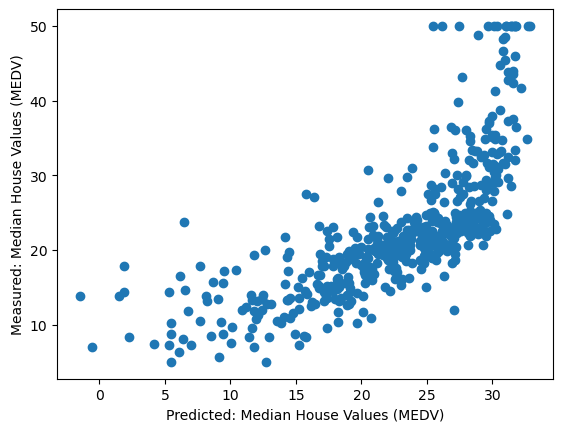

In [16]:
# Predict the Median House Value with the highest correlated feature
x = boston['LSTAT']
x = np.array(x).reshape(-1,1)
y = boston_dataset.target
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
r2 = r2_score(y_true=y, y_pred=y_pred)
print(f'Proportion of the variance in Median House Value accounted for by LSTAT (R2): {r2}')
# plotting the predicted vs. actual median house values
plt.scatter(y_pred, y)
plt.xlabel("Predicted: Median House Values (MEDV)")
plt.ylabel("Measured: Median House Values (MEDV)")

How does the prediction of the this model (R2) compare with the prediction of the model used in the exercise in class that used all the features instead of just the most correlated feature?

The R2 for this model was 0.54, whereas R2 for the model in class using all the features was .74. Therefore, the model in class accounted for a higher proportion of the variance in Median House Values.

### Question 2:

* Load the Boston Housing Dataset
* Find the feature with lowest correlation with the Median House Value
* Predict the Median House Value with all the features except the one with lowet correlation
* How does the prediction of the this model (R2) compare with the prediction of the full model model used in the exercise in class?

In [22]:
# find the feature with the lowest correlation with the Median House Value
for i in range(len(boston.columns)):
    x = boston[boston.columns[i]]
    y = boston_dataset.target
    r = np.corrcoef(x, y)
    r = r[0,1]
    print(f'{boston.columns[i]} R2: {r}')
print('\nCHAS (Charles River dummy variable) has the lowest correlation with the Median House Value')

CRIM R2: -0.38830460858681154
ZN R2: 0.3604453424505432
INDUS R2: -0.4837251600283729
CHAS R2: 0.17526017719029843
NOX R2: -0.4273207723732826
RM R2: 0.6953599470715391
AGE R2: -0.3769545650045963
DIS R2: 0.24992873408590388
RAD R2: -0.381626230639778
TAX R2: -0.4685359335677669
PTRATIO R2: -0.5077866855375621
B R2: 0.33346081965706637
LSTAT R2: -0.7376627261740151

CHAS (Charles River dummy variable) has the lowest correlation with the Median House Value


The R2 when using all variables except for CHAS is: 0.7355165089722999


Text(0, 0.5, 'Measured: Median House Values (MEDV)')

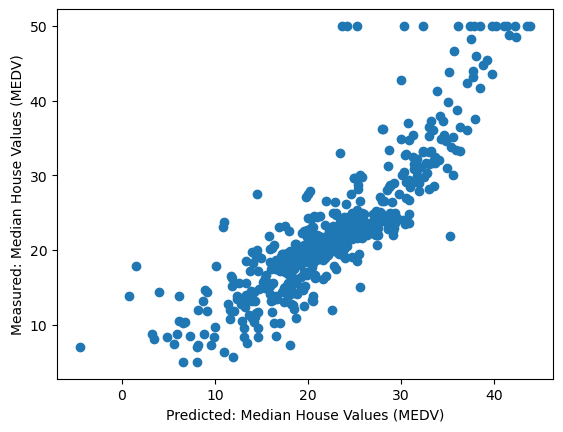

In [52]:
# Predict the Median House Value with all the features except the one with lowest correlation
x = np.array(boston.drop(columns=['CHAS'])) # dropping the column I don't want and turning it back into a numpy array
y = boston_dataset.target
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
r2 = r2_score(y_true=y, y_pred=y_pred)
print(f'The R2 when using all variables except for CHAS is: {r2}')
# plot
plt.scatter(y_pred, y)
plt.xlabel('Predicted: Median House Values (MEDV)')
plt.ylabel('Measured: Median House Values (MEDV)')

How does the prediction of this model (R2) compare with the prediction of the full model used in the exercise in class?

The R2 of this model without the lowest correlated variable (CHAS) is 0.736, whereas the R2 for the model using all variables in class was 0.740. Therefore, the model in class account for a slightly higher proportion of the variance in the data.